#Description

In this case, the descriptions from the WRDS dataset is used for unsupervised learning, more specifically clustering. To embed the descriptions, we utilize a sentence transformer, specifically the 'all-mpnet-base-v2' model. We perform agglomerative clustering with 11 clusters, corresponding to the number of sectors under analysis. We then use TF-IDF to identify the most frequent words in each cluster. In addition, we utilized t-SNE for visualizing every sector and made a scoring function to see which cluster to which sector belongs.

#Preprocessing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Capstone Datasets
%cd /content/drive/MyDrive/Capstone/label

Mounted at /content/drive


In [ ]:
#imoprt data
import pandas as pd
import numpy as np

path='related_company_after_trans.xlsx'
data = pd.read_excel(path)
data=data[["busdesc",'gind']]
df_dropna = data.dropna(subset=['gind'],how="any")
data=df_dropna
data['gind'] = data['gind'].astype(int)

In [ ]:
#preprocess
import re
import string

def preprocess_text(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)

    return text


data["busdesc"] = data["busdesc"].map(preprocess_text)
data.head()#241

,busdesc,gind
31,22 eleven 22 eleven is an ecommerce retailer b...,19
75,99bros simply insured 99bros is a digital ins...,29
109,abloh a web and mobilebased platform for stude...,39
115,abtira garden the idea behind our line is nat...,1
155,acumen acumen is changing the way the world ta...,26


In [ ]:
data

,busdesc,gind
31,22 eleven 22 eleven is an ecommerce retailer b...,19
75,99bros simply insured 99bros is a digital ins...,29
109,abloh a web and mobilebased platform for stude...,39
115,abtira garden the idea behind our line is nat...,1
155,acumen acumen is changing the way the world ta...,26
...,...,...
21259,skygrids skygrids is revolutionising the drone...,10
21428,panel iq technologies pvt ltd paneliq technolo...,20
21528,the climate consultancy the climate consultanc...,33
21617,hyrd hyrd is a revolutionary aidriven hiring t...,20


In [ ]:
pip install -U sentence-transformers

#Embedding the sentences

In [ ]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import os
import re
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(data["busdesc"].values, show_progress_bar=True)
embeddings

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

array([[ 0.03000646,  0.03380314,  0.0090706 , ...,  0.01188308,
        -0.0139406 , -0.01779515],
       [-0.00811738,  0.02543471, -0.03684896, ..., -0.0113339 ,
         0.01806335, -0.02115387],
       [ 0.02407465, -0.03847733, -0.03430545, ..., -0.0110719 ,
         0.02871395, -0.02764046],
       ...,
       [ 0.03799561,  0.03762552, -0.00832291, ...,  0.0061334 ,
        -0.02064021,  0.00049507],
       [ 0.04430972,  0.00648752, -0.00156382, ...,  0.03068515,
         0.01230648, -0.00497799],
       [-0.01681278, -0.02805598, -0.00918446, ...,  0.06674143,
         0.02378904,  0.0050703 ]], dtype=float32)

#Agglomerative Clustering

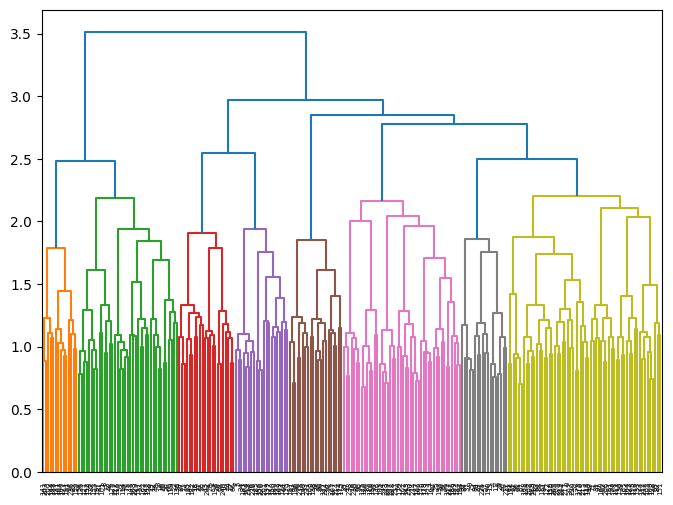

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

clusters = hierarchy.linkage(embeddings, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA

new = embeddings

connectivity = kneighbors_graph(new, n_neighbors=10, include_self=False)

model = AgglomerativeClustering(n_clusters=42, connectivity=connectivity, linkage='ward').fit(new)

In [ ]:
model.labels_

array([17, 28, 23, 10, 11, 35, 11, 35,  8, 19, 16, 11, 10, 23, 25, 11, 10,
       16,  3,  3,  3,  3, 29, 36, 11, 34, 16,  3, 23, 10,  3,  5,  7,  4,
       35, 31, 34, 19, 34, 39, 34, 38,  8,  4, 16, 15, 11, 31, 10,  5, 27,
       27,  0, 29, 14, 41, 41, 13,  7, 20, 22, 27,  5,  9,  2,  3, 16, 27,
       16, 30, 14,  5,  8,  3, 13, 19, 35, 20, 31, 20, 31,  8, 30, 12, 13,
        9, 15, 19, 12,  6, 31, 13, 19,  5, 12,  6,  4,  5, 40, 15, 37,  8,
       14, 36, 35, 25, 15, 40,  5, 36,  6, 39, 36,  0, 20, 20, 12, 12, 18,
       22, 12,  7, 12, 18, 21,  6,  6, 15, 36,  8, 39, 37, 21, 18, 12,  7,
       22, 14, 15, 33,  4, 24,  3, 14, 24,  0,  6, 29,  2, 28, 21, 30,  7,
        7, 38,  6, 26, 29, 29,  9,  5, 37, 29,  2, 18, 39, 14, 28, 12, 21,
        2, 37, 14,  0, 32, 32, 28, 33,  7, 28, 21,  5,  3, 35,  1, 26,  1,
        4, 24, 12, 13, 37,  1, 34,  1, 18,  4,  7, 23,  1, 24, 33, 23, 24,
       17, 17,  5, 17, 12, 17, 12, 17, 11, 14, 40,  0,  0,  1, 35, 17, 17,
       40, 20, 25, 15, 13

In [ ]:
label = model.fit_predict(new)

In [ ]:
len(label)

241

In [ ]:
len(set(label))

42

# similarity

In [ ]:
data

,busdesc,gind,Label
31,22 eleven 22 eleven is an ecommerce retailer b...,19,17
75,99bros simply insured 99bros is a digital ins...,29,28
109,abloh a web and mobilebased platform for stude...,39,23
115,abtira garden the idea behind our line is nat...,1,10
155,acumen acumen is changing the way the world ta...,26,11
...,...,...,...
21259,skygrids skygrids is revolutionising the drone...,10,35
21428,panel iq technologies pvt ltd paneliq technolo...,20,25
21528,the climate consultancy the climate consultanc...,33,4
21617,hyrd hyrd is a revolutionary aidriven hiring t...,20,25


In [ ]:
#
data['Label'] = label
#data.groupby(['Label', 'gind']).size().reset_index(name='count')
grouped = data.groupby(['Label', 'gind']).size().reset_index(name='count')
idx = grouped.groupby('Label')['count'].idxmax()
map_vertical=grouped.loc[idx, ['Label', 'gind', 'count']].reset_index(drop=True)
map_vertical = map_vertical.rename(columns={'gind': 'y_pred'})
map_vertical

,Label,y_pred,count
0,0,23,4
1,1,40,4
2,2,15,3
3,3,21,8
4,4,33,5
5,5,9,6
6,6,8,6
7,7,34,7
8,8,28,5
9,9,22,3


In [ ]:
# combine
result = pd.merge(data, map_vertical, on='Label', how='left')
result

,busdesc,gind,Label,y_pred,count
0,22 eleven 22 eleven is an ecommerce retailer b...,19,17,36,4
1,99bros simply insured 99bros is a digital ins...,29,28,29,5
2,abloh a web and mobilebased platform for stude...,39,23,39,5
3,abtira garden the idea behind our line is nat...,1,10,1,5
4,acumen acumen is changing the way the world ta...,26,11,26,6
...,...,...,...,...,...
236,skygrids skygrids is revolutionising the drone...,10,35,10,8
237,panel iq technologies pvt ltd paneliq technolo...,20,25,20,7
238,the climate consultancy the climate consultanc...,33,4,33,5
239,hyrd hyrd is a revolutionary aidriven hiring t...,20,25,20,7


In [ ]:
from sklearn.metrics import classification_report
# Extract correct classification and model classification
y_true = result['gind']
y_pred = result['y_pred']

# Calculate Classification Report
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
1,1.000000,0.833333,0.909091,6.00000
2,0.750000,0.750000,0.750000,4.00000
3,1.000000,1.000000,1.000000,7.00000
4,1.000000,1.000000,1.000000,7.00000
5,1.000000,0.800000,0.888889,5.00000
6,0.600000,0.500000,0.545455,6.00000
7,0.833333,1.000000,0.909091,5.00000
8,0.857143,1.000000,0.923077,6.00000
9,0.600000,0.750000,0.666667,8.00000
10,1.000000,1.000000,1.000000,8.00000
